## D1 Proposal
### Nomenclating Aliens

Team Member 1: Omar Sinan (osinan)<p>
Team Member 2: Swapnendu Sanyal (swapnens)<p>

### Project Description:
We were recently invaded by aliens from various galaxies. We have managed to somehow fight back but now we want to know more about them. However, we do not have their morphology but only have their DNA samples. We plan on differentiating the species, creating bioweapons tailored to each planet, and retaliate and annihilate them.
	The goal of this project is to predict which planet does a particular DNA sequence belong to. We have a multitude of labeled DNA sequences and we want to predict which planet do the invaders belong to.

### Project Idea:
The way that the QuAM works is by providing it with a DNA sequence of a particular size as input and using the classifier described below, the QuAM will predict the planet that the DNA sequence belongs to.
	We will be building a classifier for this problem using the three methods. Namely, we will be using the normal classifier, k-NN, and k-Means and compare the results to pick the best classifier that solves the problem.
	The QuAM will have a simple user interface that allows the user to input the DNA sequence they want to analyze and its size, after running the classifier on the given input, the QuAM will return the prediction of the planet that the DNA sequence belongs to.



### Divided Spec
Swapnendu:<p>
•	Generate the DNA data by writing a python script.<p>
•	Work on one of the classification methods.<p>
Omar:<p>
•	Feature extraction from the given data.<p>
•	Work on the other two classification methods.<p>

### Data Generation
We are going to write a python script that takes the following input:<p>
1.	Length of the sequence<p>
2.	Number of planets<p>
3.	Number of data points<p>
We are going to randomly generate a string of DNA sequence and make it our first cluster. Now, we keep generating clusters that are significantly far from each other for the remaining clusters randomly. Now, we have the clusters, we randomly generate sequences that belong to those clusters. We will output all the DNA sequences with their labels.


## D2 Dataset Generation

### D2.1 Data Collection

We have 5 types of methods to generate data.
How many points of a type in the dataset? 5000
How many clusters of a type in the dataset? 5
How many feature_values in the dataset? 20
How long is a DNA sequence? 20
1
2
10
14


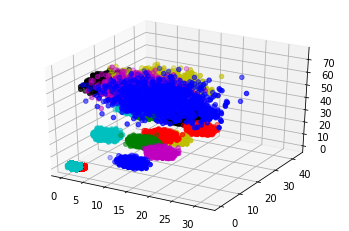

Your csv has been generated.


In [31]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn import preprocessing
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import json

GLOBAL_RANDOM_STATE = 500
random.seed(GLOBAL_RANDOM_STATE)

args = {
    "points": {
        "question": "How many points of a type in the dataset? ",
        "value": None
    },
    "clusters": {
        "question": "How many clusters of a type in the dataset? ",
        "value": None
    },
    "feature_value": {
        "question": "How many feature_values in the dataset? ",
        "value": None
    },
    "length": {
        "question": "How long is a DNA sequence? ",
        "value": None
    }
}


def getInput():
    """
    points -- Number of points to be generated
    clusters -- number of clusters to be generated
    length -- size of the DNA sequence
    feature-value -- Number of different protein-bases possible
                     In humans, it is 4, [A,T,G,C]
    """
    print("We have 5 types of methods to generate data.")
    for k, v in args.items():
        temp = int(input(v["question"]))
        if temp > 0:
            v["value"] = temp
        else:
            print("{} is not a valid input for {}".format(temp, k))
            exit(-1)
    if args["points"]["value"] < 10 * args["clusters"]["value"]:
        print("\nERROR: {} is too large a cluster for {} points.".format(
            args["clusters"]["value"], args["points"]["value"]))
        exit(-1)
    if (args["points"]["value"] >
            args["feature_value"]["value"] ** args["length"]["value"]):
        print(("\nERROR: {} feature_value and DNA of length {} is too small for {}"
               + " points.").format(
            args["feature_value"]["value"], args["length"]["value"],
            args["points"]["value"]))
        exit(-1)

    return {k: v["value"] for k, v in args.items()}


def makeBlobs(data):
    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=1.2,
                                   center_box=(0, data["feature_value"]),
                                   shuffle=True,
                                   random_state=GLOBAL_RANDOM_STATE
                                   )
    return (np.abs(np.round(features)).astype(int), targets)


def make_linear_clusters(data):
    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=1.2,
                                   center_box=(0, data["feature_value"]),
                                   shuffle=True,
                                   random_state=GLOBAL_RANDOM_STATE
                                   )

    contractFeatures = random.sample(
        list(range(data["length"])),
        random.randint(0, int(0.5*data["length"])))
    for column in range(data["length"]):
        if column in contractFeatures:
            features[:, column] = features[:, column]/(2 + random.random())
    return (np.abs(np.round(features)).astype(int), targets)


def make_noisy_clusters(data):
    small_std = np.arange(0.5, 5, 0.5)
    large_std = np.arange(5, 10, 0.5)
    small_perc = 0.8
    split = int(data["clusters"] * small_perc)
    cluster_std1 = np.random.choice(small_std, split)
    cluster_std2 = np.random.choice(large_std, data["clusters"] - split)
    cluster_std = np.append(cluster_std1, cluster_std2)

    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=cluster_std,
                                   center_box=(0, data["feature_value"]),
                                   random_state=GLOBAL_RANDOM_STATE)

    return (np.abs(np.round(features)).astype(int), targets)


def make_moon_clusters(data):
    noise = np.random.choice(np.arange(0.05, 0.1, 0.01), 1)
    features, targets = make_moons(n_samples=data["points"],
                                   noise=noise,
                                   random_state=GLOBAL_RANDOM_STATE)

    new_features = features + abs(np.min(features))
    zeros = np.random.randint(
        -2,2,(data["points"], data["length"] - 2), dtype=int)
    new_features = np.append(new_features, zeros, axis=1)
    return (np.abs(np.round(new_features)).astype(int), targets)


def make_circle_clusters(data):
    noise = np.random.choice(np.arange(0.05, 0.1, 0.01), 1)
    factor = np.random.choice(np.arange(0.1, 0.7, 0.05), 1)
    features, targets = make_circles(n_samples=data["points"],
                                     noise=noise,
                                     factor=factor,
                                     random_state=GLOBAL_RANDOM_STATE)

    new_features = features + abs(np.min(features))
    zeros = np.random.randint(
        -2,2,(data["points"], data["length"] - 2), dtype=int)
    new_features = np.append(new_features, zeros, axis=1)
    return (np.abs(np.round(new_features)).astype(int), targets)

def create(filename="test.csv"):
    data = getInput()
    json.dumps(data,indent=8)
    centerOffset = data["feature_value"]+1

    featureBlob, targetBlob = makeBlobs(data)

    featureLinear, targetLinear = make_linear_clusters(data)
    push_choice = random.randint(0,featureLinear.shape[1]-1)
    print(push_choice)
    featureLinear[:,push_choice] +=  centerOffset
    targetLinear = targetLinear + np.max(targetBlob) + 1

    featureNoisy, targetNoisy = make_noisy_clusters(data)
    push_choice = random.randint(0,featureLinear.shape[1]-1)
    print(push_choice)
    featureNoisy[:,push_choice] +=  2*centerOffset
    targetNoisy = targetNoisy + np.max(targetLinear) + 1

    featureMoon, targetMoon = make_moon_clusters(data)
    push_choice = random.randint(0,featureLinear.shape[1]-1)
    print(push_choice)
    featureMoon[:,push_choice] +=  4*centerOffset
    targetMoon = targetMoon + np.max(targetNoisy) + 1

    featureCircle, targetCircle = make_circle_clusters(data)
    push_choice = random.randint(0,featureLinear.shape[1]-1)
    print(push_choice)
    featureCircle[:,push_choice] += 5*centerOffset
    targetCircle = targetCircle + np.max(targetMoon) + 1

    features = np.concatenate(
        (featureBlob, featureLinear, featureNoisy,featureMoon,featureCircle))
    target = np.concatenate(
        (targetBlob, targetLinear, targetNoisy,targetMoon,targetCircle))



    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colorMap = "bgrcmyk"*np.max(target)
    for i in range(np.max(target)):
        feature = features[target == i]
        ax.scatter(feature[:, 0], feature[:, 1],feature[:, 2], color=colorMap[i])
    plt.show()


    df = pd.DataFrame(features, columns=["x{}".format(i) for i in range(data["length"])])
    df_nan = df.mask(np.random.random(df.shape) < .05)
    df_nan["target"] = target
    df_nan.to_csv(filename,index=False)

# create("finalDataSet.csv")
# create()
print("Your csv has been generated.")

### D2.2: Data Analysis

In [6]:
import pandas as pd 
data = pd.read_csv("test.csv")
# data = pd.read_csv("finalDataSet.csv")

In [7]:
data

,x0,x1,x2,x3,target
0,3.0,2.0,5.0,NaN,2
1,0.0,0.0,3.0,0.0,1
2,1.0,2.0,2.0,6.0,3
3,0.0,0.0,3.0,5.0,3
4,0.0,0.0,0.0,3.0,3
...,...,...,...,...,...
995,1.0,1.0,25.0,0.0,15
996,1.0,2.0,26.0,2.0,14
997,0.0,0.0,26.0,2.0,14
998,1.0,NaN,25.0,2.0,15


In [8]:
data.describe()

,x0,x1,x2,x3,target
count,952.000000,955.000000,948.000000,960.000000,1000.000000
mean,5.817227,3.710995,7.166667,2.838542,8.700000
std,8.139698,5.123039,9.610452,3.020606,4.799274
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,4.750000
50%,2.000000,2.000000,3.000000,2.000000,9.500000
75%,4.000000,3.000000,5.000000,5.000000,13.000000
max,23.000000,29.000000,27.000000,29.000000,15.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      952 non-null    float64
 1   x1      955 non-null    float64
 2   x2      948 non-null    float64
 3   x3      960 non-null    float64
 4   target  1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


Although we see that the values are floating point numbers and integers, we know that this data represents DNA sequences where each feature is a protein base. Hence, all the values should be treated as categorical data.

In [10]:
features, target = (data.iloc[:,:-1],data.iloc[:,-1])
clusters = np.unique(target)
print("There are {} clusters in the dataset which are:\n{}".format(len(clusters),clusters))
print("\nThe features are of dimension {} * {}.".format(features.shape[0],features.shape[1]))
print("\n\nThe features can be described as follows:")
features.describe()

There are 16 clusters in the dataset which are:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

The features are of dimension 1000 * 4.


The features can be described as follows:


,x0,x1,x2,x3
count,952.000000,955.000000,948.000000,960.000000
mean,5.817227,3.710995,7.166667,2.838542
std,8.139698,5.123039,9.610452,3.020606
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,3.000000,2.000000
75%,4.000000,3.000000,5.000000,5.000000
max,23.000000,29.000000,27.000000,29.000000


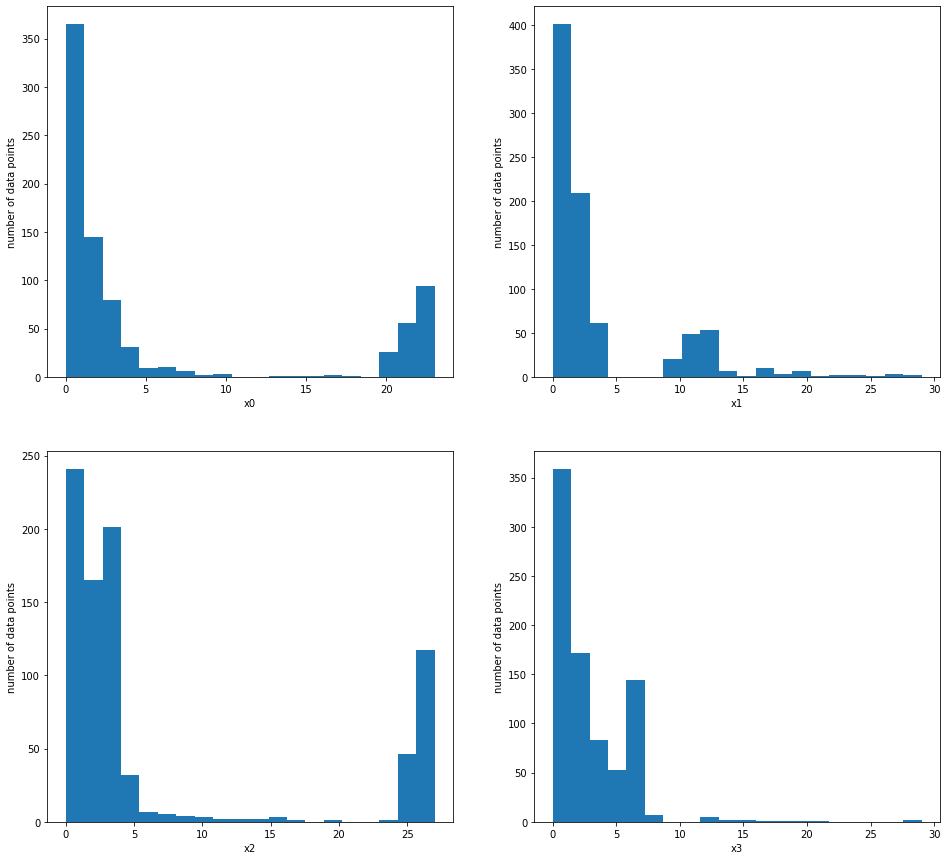

In [11]:
import math
rows = int(math.sqrt(features.shape[1]))
cols = features.shape[1] // rows
figure, subplots = plt.subplots(rows,cols, figsize=(16,15))
for i in range(rows):
    for j in range(cols):
        subplots[i,j].set_xlabel(data.columns[rows*i+j])
        subplots[i,j].set_ylabel("number of data points")
        subplots[i,j].hist(features.dropna().iloc[:,rows*i+j].transpose(),bins=20)

We notice no definite shape (eg. Gaussian) in the feature distribution. However, one can easily observe that the plots are almost identical in shape.

In [12]:
print(f"There are {np.sum(np.sum(np.isnan(features)))} nan values in total.")
for featureName in features.columns:
    print(f"Feature '{featureName}' has {np.sum(np.isnan(features.loc[:,featureName]))} nan values.")

There are 185 nan values in total.
Feature 'x0' has 48 nan values.
Feature 'x1' has 45 nan values.
Feature 'x2' has 52 nan values.
Feature 'x3' has 40 nan values.


4 plots to be generated with 1000 points.


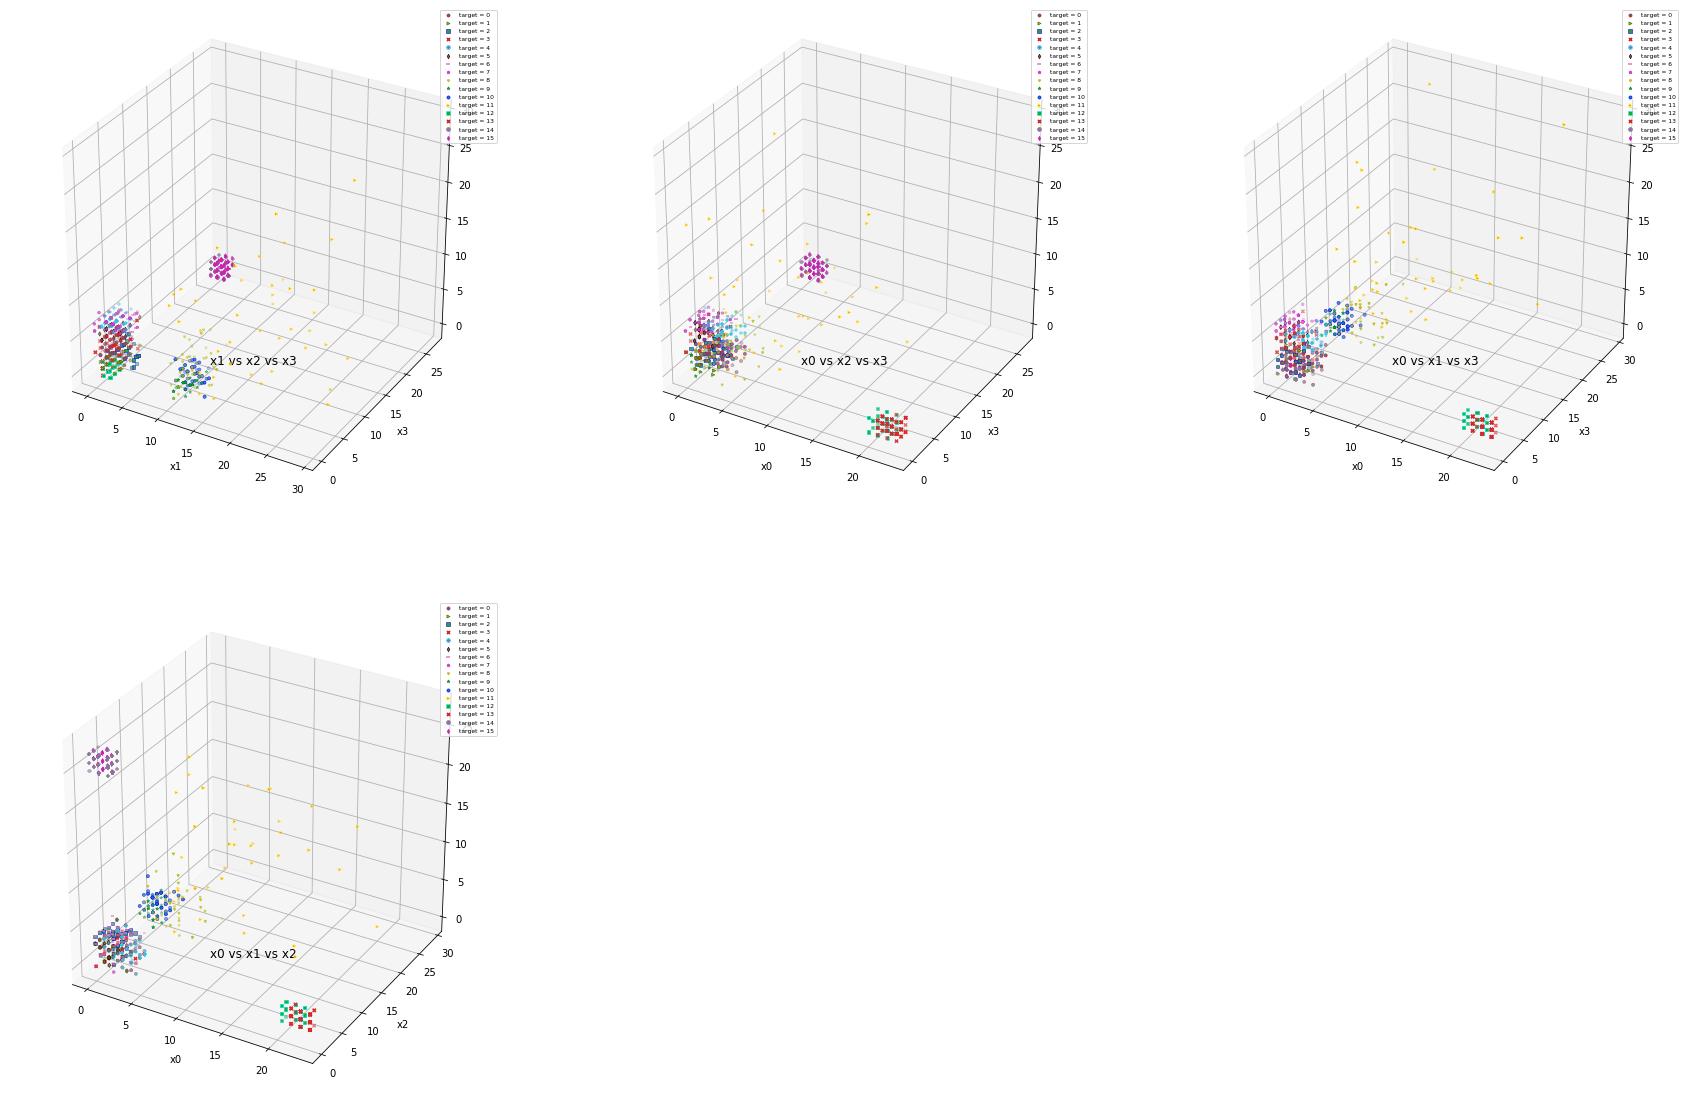

In [13]:
import itertools
feature_pairings = list(itertools.combinations(features.columns,3))
cols = 3
rows = math.ceil(len(feature_pairings)/cols)
figure, subplots = plt.subplots(
    rows, cols, figsize=(10*cols, 10*rows),subplot_kw = {"projection" : "3d"})

colors = ['r','g', 'b', 'yellow', 'cyan', 'black', 'gray', 'magenta']*len(np.unique(target))
markers = ['o', '>', 's', 'x', 'P', 'd', '_', 'p', '1', '*']*len(np.unique(target))

print("{} plots to be generated with {} points.".format(len(feature_pairings),len(target)))

for i in range(rows):
    for j in range(cols):
        if feature_pairings:
            feature1, feature2,feature3  = feature_pairings.pop()       
            subplots[i,j].set_xlabel(feature1)
            subplots[i,j].set_ylabel(feature2)
            subplots[i,j].set_ylabel(feature3)
            for t in set(target):
                subplots[i,j].scatter(features.loc[target == t,feature1],
                                    features.loc[target == t,feature2],
                                    features.loc[target == t,feature3],
                                    marker = markers[t],
                                    edgecolors = colors[t],
                                    linewidths=0.55, s=10, label='target = {}'.format(t))
                subplots[i,j].set_title(f"{feature1} vs {feature2} vs {feature3}")
            subplots[i,j].legend(prop={"size":6})
        else:
            subplots[i,j].axis("off")
    


From the plots, we can clearly see that there is no linear correlation abong the features. This observation is consistent with our idea of data generation that we used.

### D2.3: Data Wrangling

In [14]:
import numpy as np
total_nan = np.sum(np.sum(features.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

Total non-numeric entries: 185


In [15]:
drop_threshold = 0.3
# m = np.sum(np.sum(features.isnull()))
# n = features.shape[0] * features.shape[1]

# Drop rows with too many missing entries
r = data.shape[1] - 1
df = data.dropna(axis=0, thresh=data.shape[1] - (r * drop_threshold))

# Drop columns with too many missing entries
c = len(features)
df = df.dropna(axis=1, thresh=len(data) - (c * drop_threshold))

In [16]:
total_nan = np.sum(np.sum(df.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))
df

Total non-numeric entries: 149


,x0,x1,x2,x3,target
0,3.0,2.0,5.0,NaN,2
1,0.0,0.0,3.0,0.0,1
2,1.0,2.0,2.0,6.0,3
3,0.0,0.0,3.0,5.0,3
4,0.0,0.0,0.0,3.0,3
...,...,...,...,...,...
995,1.0,1.0,25.0,0.0,15
996,1.0,2.0,26.0,2.0,14
997,0.0,0.0,26.0,2.0,14
998,1.0,NaN,25.0,2.0,15


In [17]:
df = df.apply(lambda x: x.fillna(int(x.mode()))).astype(int)
df

,x0,x1,x2,x3,target
0,3,2,5,1,2
1,0,0,3,0,1
2,1,2,2,6,3
3,0,0,3,5,3
4,0,0,0,3,3
...,...,...,...,...,...
995,1,1,25,0,15
996,1,2,26,2,14
997,0,0,26,2,14
998,1,1,25,2,15


In [18]:
total_nan = np.sum(np.sum(df.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

Total non-numeric entries: 0


### D2.4: Feature Engineering

In [19]:
#Getting dummy features
features,target = (df.iloc[:,:-1],df.iloc[:,-1])
features_new = pd.get_dummies(features,prefix=features.columns,columns = features.columns)
features

,x0,x1,x2,x3
0,3,2,5,1
1,0,0,3,0
2,1,2,2,6
3,0,0,3,5
4,0,0,0,3
...,...,...,...,...
995,1,1,25,0
996,1,2,26,2
997,0,0,26,2
998,1,1,25,2


Clearly, we can see that we cannot use polynomial features due to explosion in the number of features. Intuitively, we also feel that polynomial features would not increase accuracy in a binary dataset as the values will remain 0 or 1. The only advantage that we may get is that the features of higher degree would be sparser.

In [20]:
from sklearn.decomposition import PCA 

for components in [(int(features_new.shape[1]*perc/100)) for perc in range(5,100,5)]:
    pca_features = PCA(components)
    features_transformed = pca_features.fit(features_new)
    print("{} compnents is able to explain {:.2f}% of the variance.".format(
        pca_features.components_.shape[0],100*pca_features.explained_variance_ratio_.sum()))

4 compnents is able to explain 33.40% of the variance.
9 compnents is able to explain 58.65% of the variance.
13 compnents is able to explain 70.74% of the variance.
18 compnents is able to explain 80.65% of the variance.
22 compnents is able to explain 86.78% of the variance.
27 compnents is able to explain 92.57% of the variance.
31 compnents is able to explain 95.19% of the variance.
36 compnents is able to explain 96.86% of the variance.
40 compnents is able to explain 97.69% of the variance.
45 compnents is able to explain 98.47% of the variance.
50 compnents is able to explain 99.00% of the variance.
54 compnents is able to explain 99.30% of the variance.
59 compnents is able to explain 99.57% of the variance.
63 compnents is able to explain 99.71% of the variance.
68 compnents is able to explain 99.85% of the variance.
72 compnents is able to explain 99.93% of the variance.
77 compnents is able to explain 99.98% of the variance.
81 compnents is able to explain 100.00% of the var

We choose 180 component as it effectivele differentiates 90.08% of our data. This leads to a huge reduction in the number of features.

In [21]:
components = 180
pca_df = PCA(components)
df_transformed = pd.DataFrame(
    pca_df.fit_transform(features_new),columns=[f"new_x{i}" for i in range(components)])
print("{} compnents is able to explain {:.2f}% of the variance.".format(
            pca_df.components_.shape[0],100*pca_df.explained_variance_ratio_.sum()))

25 compnents is able to explain 90.60% of the variance.


In [22]:
print(df_transformed.shape,target.shape)
df = pd.concat([df_transformed,target],axis=1,join="inner")
df

(982, 25) (982,)


,new_x0,new_x1,new_x2,new_x3,new_x4,new_x5,new_x6,new_x7,new_x8,new_x9,...,new_x16,new_x17,new_x18,new_x19,new_x20,new_x21,new_x22,new_x23,new_x24,target
0,0.321994,0.844251,-0.522313,-0.098820,0.034187,0.215919,-0.162957,-0.265089,-0.275482,-0.296624,...,0.164779,0.490361,0.158004,0.054130,0.252989,0.097893,0.205523,0.258678,-0.189220,2
1,0.268200,-0.520011,-0.643126,-0.272629,0.439598,-0.499197,0.457458,-1.001686,0.602652,0.036578,...,-0.044829,-0.281238,-0.087900,0.040648,0.001168,0.034494,-0.151452,-0.063578,-0.008544,1
2,0.974848,0.142166,0.065793,0.008705,-0.845075,-0.581657,-0.360366,0.429356,-0.398583,0.494868,...,-0.068518,-0.011381,-0.013828,0.037218,0.074712,-0.086862,-0.063523,-0.031114,0.029659,3
3,0.343204,-0.510815,-0.677840,-0.442220,0.639660,-0.146455,-0.080036,-0.844391,0.291225,0.301026,...,-0.430599,-0.231724,0.470801,0.090627,-0.064697,0.013221,-0.090218,0.093995,-0.110872,3
4,0.128320,-0.248434,-0.521557,-0.290289,0.286964,-0.135510,-0.096485,-0.647885,0.858574,0.127886,...,-0.018956,0.450871,-0.381452,0.341206,-0.203094,0.373844,-0.571394,-0.076259,0.209630,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,-0.291225,-0.412254,0.809672,-0.243825,-0.416282,-0.593192,0.753379,-0.131052,-0.031317,-0.210501,...,0.169940,0.365565,0.199056,-0.072758,-0.340462,-0.166752,0.024149,0.035601,0.013896,14
978,0.921559,-0.079474,0.551856,0.219456,-0.539291,0.723902,0.499908,-0.130222,-0.056586,0.274700,...,-0.017363,0.028553,-0.012285,-0.015094,-0.058724,-0.059798,0.031795,-0.054188,-0.016362,15
979,0.229240,-0.562858,-0.263179,-0.113094,0.106492,0.699945,0.171406,-0.612962,1.144468,0.623761,...,0.021796,-0.103830,0.021940,-0.011288,-0.152575,-0.038006,-0.035878,-0.022897,0.006989,14
980,-0.176326,-0.696196,0.952174,-0.143502,-0.412079,0.547435,0.157809,0.020973,-0.153038,0.036824,...,0.159375,0.405455,0.192470,-0.099957,-0.403842,-0.174929,0.040294,0.014199,0.025980,15


In [23]:
df_transformed.describe()

,new_x0,new_x1,new_x2,new_x3,new_x4,new_x5,new_x6,new_x7,new_x8,new_x9,...,new_x15,new_x16,new_x17,new_x18,new_x19,new_x20,new_x21,new_x22,new_x23,new_x24
count,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,...,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02
mean,2.690765e-17,-1.109092e-16,-2.747293e-17,-9.643791e-17,-2.543790e-17,1.050303e-16,1.093830e-16,-1.831529e-17,2.238535e-17,-3.554240e-18,...,1.917735e-17,-5.878981e-18,-9.327230e-18,-2.933838e-17,2.687938e-17,-5.228902e-17,-2.410948e-17,-2.050577e-17,7.798836e-17,9.311685e-17
std,5.706261e-01,5.294284e-01,5.146343e-01,4.751383e-01,4.500854e-01,4.185313e-01,4.021185e-01,3.896683e-01,3.711614e-01,3.388576e-01,...,2.500315e-01,2.449094e-01,2.432804e-01,2.360907e-01,2.247667e-01,2.194748e-01,2.159837e-01,2.072525e-01,2.056058e-01,2.007239e-01
min,-1.064763e+00,-9.710046e-01,-9.772198e-01,-1.060836e+00,-1.082271e+00,-8.017688e-01,-9.860641e-01,-1.001686e+00,-1.057359e+00,-8.320214e-01,...,-6.241052e-01,-9.388388e-01,-6.201135e-01,-9.024449e-01,-7.359009e-01,-6.073049e-01,-6.723471e-01,-5.713941e-01,-6.846446e-01,-7.028724e-01
25%,-5.255474e-01,-4.314799e-01,-4.338193e-01,-3.659578e-01,-3.222542e-01,-3.458706e-01,-3.134790e-01,-2.430421e-01,-2.003099e-01,-2.098311e-01,...,-9.913958e-02,-9.511825e-02,-1.218551e-01,-8.885715e-02,-4.776597e-02,-1.492279e-01,-8.227206e-02,-1.135360e-01,-7.918558e-02,-5.920560e-02
50%,1.232263e-01,-1.220039e-01,-5.628472e-02,-4.134303e-02,7.944834e-02,-1.546262e-02,-6.868090e-02,-2.531255e-02,-2.569295e-02,-4.904750e-02,...,-1.714686e-02,-1.120706e-02,4.141475e-03,-1.033103e-02,7.263856e-03,6.721282e-03,-2.716686e-02,-2.604835e-02,-5.506854e-03,2.547821e-02
75%,4.322236e-01,3.969124e-01,4.285011e-01,2.740273e-01,3.373075e-01,2.929709e-01,2.501096e-01,2.269109e-01,1.957738e-01,1.734255e-01,...,5.606487e-02,8.470739e-02,1.016944e-01,7.578364e-02,5.508756e-02,1.083140e-01,4.782966e-02,5.980042e-02,1.178994e-01,7.485290e-02
max,1.085578e+00,1.317728e+00,1.210302e+00,1.370679e+00,1.123411e+00,9.741722e-01,1.441855e+00,1.110901e+00,1.266189e+00,1.144801e+00,...,8.529357e-01,1.217696e+00,7.647700e-01,1.181870e+00,9.355034e-01,6.739852e-01,8.683003e-01,1.462860e+00,8.993407e-01,8.736173e-01


In [24]:
df.shape

(964, 26)

In [26]:
df_total = pd.concat([df_transformed,pd.DataFrame({"target":target.values})],axis=1)
df_total.describe()

,new_x0,new_x1,new_x2,new_x3,new_x4,new_x5,new_x6,new_x7,new_x8,new_x9,...,new_x16,new_x17,new_x18,new_x19,new_x20,new_x21,new_x22,new_x23,new_x24,target
count,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,...,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,9.820000e+02,982.000000
mean,2.690765e-17,-1.109092e-16,-2.747293e-17,-9.643791e-17,-2.543790e-17,1.050303e-16,1.093830e-16,-1.831529e-17,2.238535e-17,-3.554240e-18,...,-5.878981e-18,-9.327230e-18,-2.933838e-17,2.687938e-17,-5.228902e-17,-2.410948e-17,-2.050577e-17,7.798836e-17,9.311685e-17,8.677189
std,5.706261e-01,5.294284e-01,5.146343e-01,4.751383e-01,4.500854e-01,4.185313e-01,4.021185e-01,3.896683e-01,3.711614e-01,3.388576e-01,...,2.449094e-01,2.432804e-01,2.360907e-01,2.247667e-01,2.194748e-01,2.159837e-01,2.072525e-01,2.056058e-01,2.007239e-01,4.801532
min,-1.064763e+00,-9.710046e-01,-9.772198e-01,-1.060836e+00,-1.082271e+00,-8.017688e-01,-9.860641e-01,-1.001686e+00,-1.057359e+00,-8.320214e-01,...,-9.388388e-01,-6.201135e-01,-9.024449e-01,-7.359009e-01,-6.073049e-01,-6.723471e-01,-5.713941e-01,-6.846446e-01,-7.028724e-01,0.000000
25%,-5.255474e-01,-4.314799e-01,-4.338193e-01,-3.659578e-01,-3.222542e-01,-3.458706e-01,-3.134790e-01,-2.430421e-01,-2.003099e-01,-2.098311e-01,...,-9.511825e-02,-1.218551e-01,-8.885715e-02,-4.776597e-02,-1.492279e-01,-8.227206e-02,-1.135360e-01,-7.918558e-02,-5.920560e-02,4.000000
50%,1.232263e-01,-1.220039e-01,-5.628472e-02,-4.134303e-02,7.944834e-02,-1.546262e-02,-6.868090e-02,-2.531255e-02,-2.569295e-02,-4.904750e-02,...,-1.120706e-02,4.141475e-03,-1.033103e-02,7.263856e-03,6.721282e-03,-2.716686e-02,-2.604835e-02,-5.506854e-03,2.547821e-02,9.000000
75%,4.322236e-01,3.969124e-01,4.285011e-01,2.740273e-01,3.373075e-01,2.929709e-01,2.501096e-01,2.269109e-01,1.957738e-01,1.734255e-01,...,8.470739e-02,1.016944e-01,7.578364e-02,5.508756e-02,1.083140e-01,4.782966e-02,5.980042e-02,1.178994e-01,7.485290e-02,13.000000
max,1.085578e+00,1.317728e+00,1.210302e+00,1.370679e+00,1.123411e+00,9.741722e-01,1.441855e+00,1.110901e+00,1.266189e+00,1.144801e+00,...,1.217696e+00,7.647700e-01,1.181870e+00,9.355034e-01,6.739852e-01,8.683003e-01,1.462860e+00,8.993407e-01,8.736173e-01,15.000000


In [27]:
df_total.shape

(982, 26)

In [28]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   new_x0   982 non-null    float64
 1   new_x1   982 non-null    float64
 2   new_x2   982 non-null    float64
 3   new_x3   982 non-null    float64
 4   new_x4   982 non-null    float64
 5   new_x5   982 non-null    float64
 6   new_x6   982 non-null    float64
 7   new_x7   982 non-null    float64
 8   new_x8   982 non-null    float64
 9   new_x9   982 non-null    float64
 10  new_x10  982 non-null    float64
 11  new_x11  982 non-null    float64
 12  new_x12  982 non-null    float64
 13  new_x13  982 non-null    float64
 14  new_x14  982 non-null    float64
 15  new_x15  982 non-null    float64
 16  new_x16  982 non-null    float64
 17  new_x17  982 non-null    float64
 18  new_x18  982 non-null    float64
 19  new_x19  982 non-null    float64
 20  new_x20  982 non-null    float64
 21  new_x21  982 non

In [29]:
df_total

,new_x0,new_x1,new_x2,new_x3,new_x4,new_x5,new_x6,new_x7,new_x8,new_x9,...,new_x16,new_x17,new_x18,new_x19,new_x20,new_x21,new_x22,new_x23,new_x24,target
0,0.321994,0.844251,-0.522313,-0.098820,0.034187,0.215919,-0.162957,-0.265089,-0.275482,-0.296624,...,0.164779,0.490361,0.158004,0.054130,0.252989,0.097893,0.205523,0.258678,-0.189220,2
1,0.268200,-0.520011,-0.643126,-0.272629,0.439598,-0.499197,0.457458,-1.001686,0.602652,0.036578,...,-0.044829,-0.281238,-0.087900,0.040648,0.001168,0.034494,-0.151452,-0.063578,-0.008544,1
2,0.974848,0.142166,0.065793,0.008705,-0.845075,-0.581657,-0.360366,0.429356,-0.398583,0.494868,...,-0.068518,-0.011381,-0.013828,0.037218,0.074712,-0.086862,-0.063523,-0.031114,0.029659,3
3,0.343204,-0.510815,-0.677840,-0.442220,0.639660,-0.146455,-0.080036,-0.844391,0.291225,0.301026,...,-0.430599,-0.231724,0.470801,0.090627,-0.064697,0.013221,-0.090218,0.093995,-0.110872,3
4,0.128320,-0.248434,-0.521557,-0.290289,0.286964,-0.135510,-0.096485,-0.647885,0.858574,0.127886,...,-0.018956,0.450871,-0.381452,0.341206,-0.203094,0.373844,-0.571394,-0.076259,0.209630,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,-0.291225,-0.412254,0.809672,-0.243825,-0.416282,-0.593192,0.753379,-0.131052,-0.031317,-0.210501,...,0.169940,0.365565,0.199056,-0.072758,-0.340462,-0.166752,0.024149,0.035601,0.013896,15
978,0.921559,-0.079474,0.551856,0.219456,-0.539291,0.723902,0.499908,-0.130222,-0.056586,0.274700,...,-0.017363,0.028553,-0.012285,-0.015094,-0.058724,-0.059798,0.031795,-0.054188,-0.016362,14
979,0.229240,-0.562858,-0.263179,-0.113094,0.106492,0.699945,0.171406,-0.612962,1.144468,0.623761,...,0.021796,-0.103830,0.021940,-0.011288,-0.152575,-0.038006,-0.035878,-0.022897,0.006989,14
980,-0.176326,-0.696196,0.952174,-0.143502,-0.412079,0.547435,0.157809,0.020973,-0.153038,0.036824,...,0.159375,0.405455,0.192470,-0.099957,-0.403842,-0.174929,0.040294,0.014199,0.025980,15


In [30]:
df_total.to_csv("finalData_cleaned.csv",index=False)